<a href="https://colab.research.google.com/github/leinaxd/NOTES/blob/main/digital_image_processing/notebooks/10_edge_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import urllib.request

(532, 796, 3)


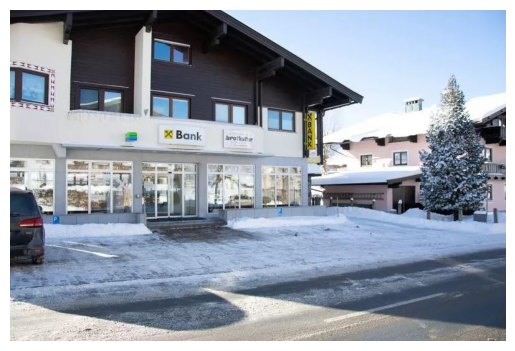

In [5]:
url = "https://github.com/leinaxd/NOTES/raw/main/digital_image_processing/notebooks/bank.jpeg"
with urllib.request.urlopen(url) as url:
    img = plt.imread(url, format='jpg')
plt.imshow(img)
plt.axis('off')

print(img.shape)

In [6]:
r_mask = img[:, :, 0]
g_mask = img[:, :, 1]
b_mask = img[:, :, 2]

#turn image to gray
g_img = r_mask*0.2989 + g_mask*0.5870 + b_mask*0.1140
u_img = np.uint8(g_img)

In [7]:
plt.style.use('dark_background')

Edge detection

1. Apply directional derivatives
2. Threshold image

raw derivatives

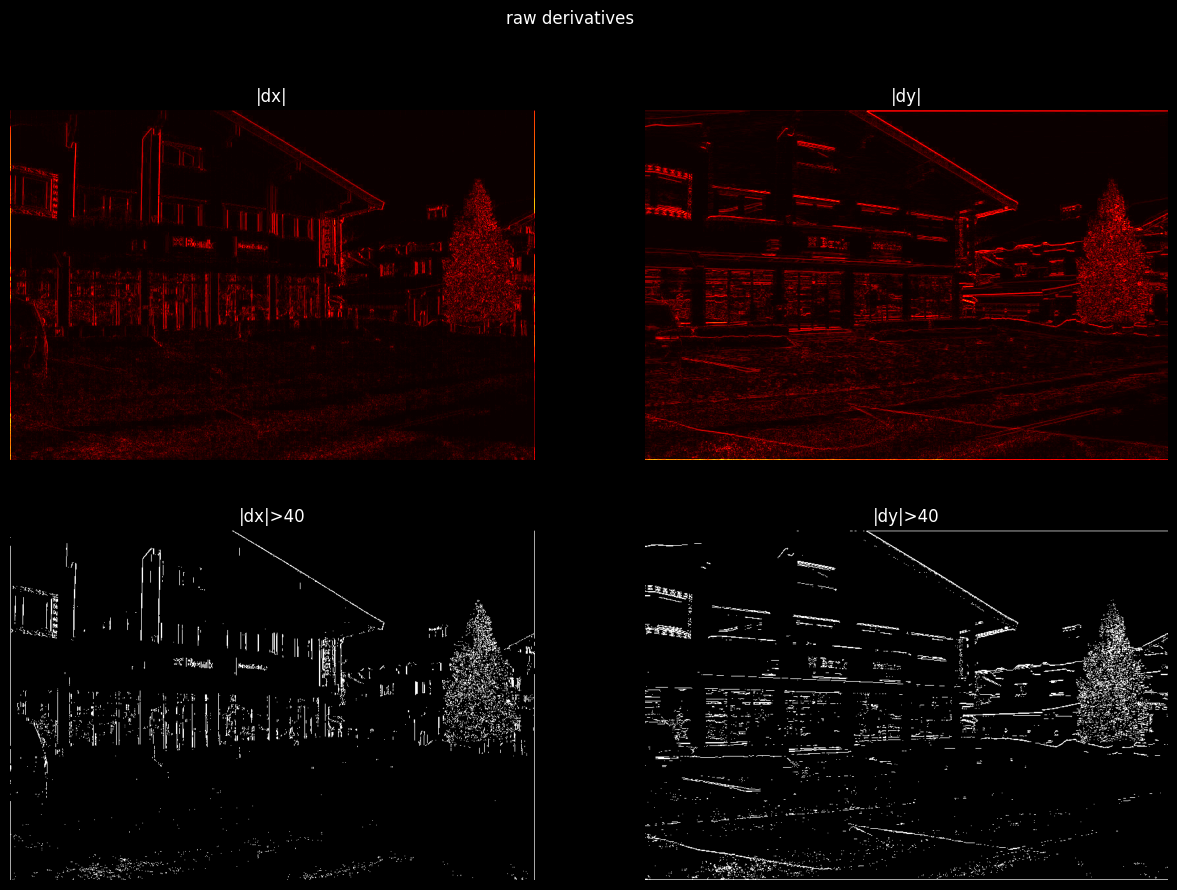

In [50]:
from scipy import signal

dx = np.array([[-1, 1]]) #direction of the gradient
dy = np.array([[-1],[1]])
threshold = 40


gx = signal.convolve2d(g_img, dx)
gy = signal.convolve2d(g_img, dy)

gx = np.abs(gx)
gy = np.abs(gy)
fig, ax = plt.subplots(2,2, figsize=(15, 10))
fig.suptitle(f'raw derivatives')

ax[0][0].imshow(gx, cmap = 'hot')
ax[0][0].set_title('|dx|')
ax[0][0].axis('off');

ax[0][1].imshow(gy, cmap='hot')
ax[0][1].set_title('|dy|')
ax[0][1].axis('off');

ax[1][0].imshow(gx>threshold, cmap = 'gray')
ax[1][0].set_title(f'|dx|>{threshold}')
ax[1][0].axis('off');

ax[1][1].imshow(gy>threshold, cmap='gray')
ax[1][1].set_title(f'|dy|>{threshold}')
ax[1][1].axis('off');

sobel derivatives

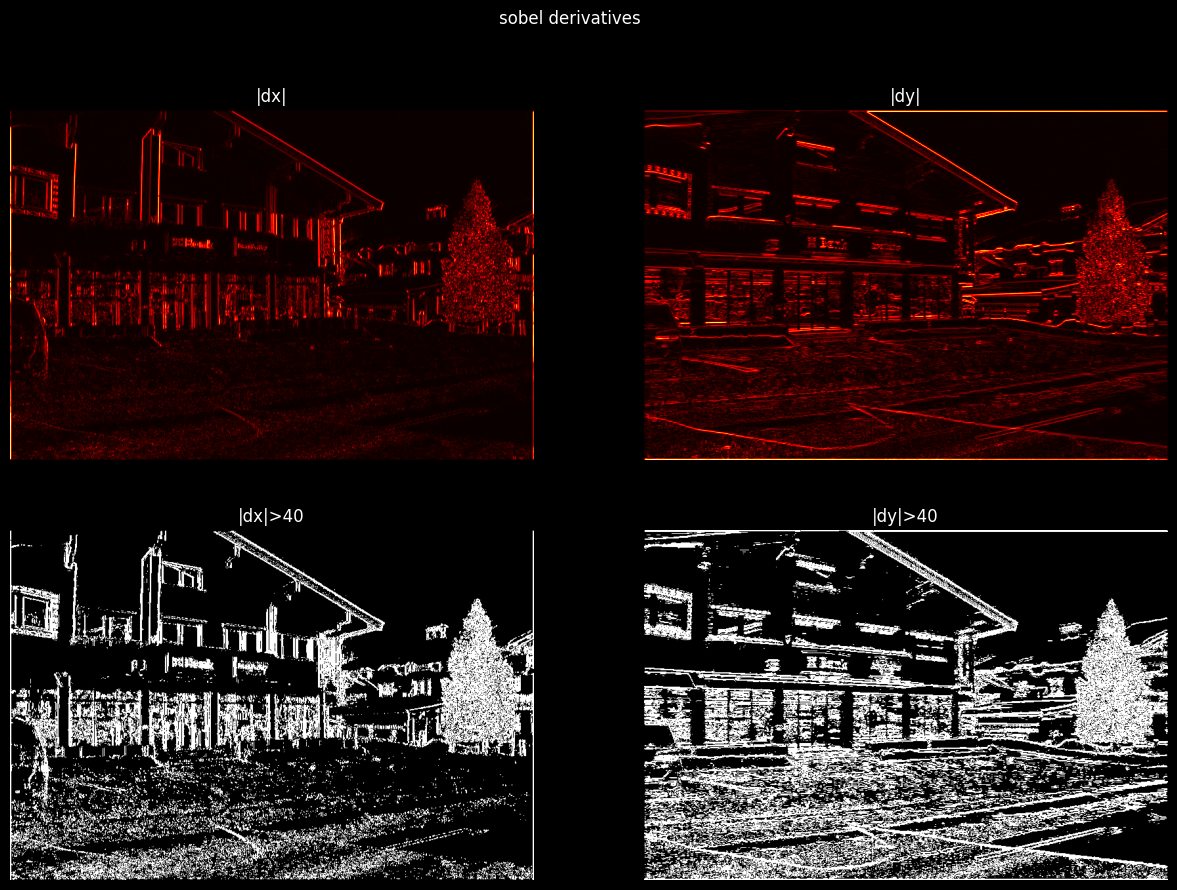

In [53]:
from scipy import signal

dx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]) #direction of the gradient
dy = dx.T
threshold = 40


gx = signal.convolve2d(g_img, dx)
gy = signal.convolve2d(g_img, dy)

gx = np.abs(gx)
gy = np.abs(gy)
fig, ax = plt.subplots(2,2, figsize=(15, 10))

fig.suptitle(f'sobel derivatives')

ax[0][0].imshow(gx, cmap = 'hot')
ax[0][0].set_title('|dx|')
ax[0][0].axis('off');

ax[0][1].imshow(gy, cmap='hot')
ax[0][1].set_title('|dy|')
ax[0][1].axis('off');

ax[1][0].imshow(gx>threshold, cmap = 'gray')
ax[1][0].set_title(f'|dx|>{threshold}')
ax[1][0].axis('off');

ax[1][1].imshow(gy>threshold, cmap='gray')
ax[1][1].set_title(f'|dy|>{threshold}')
ax[1][1].axis('off');

Derivative Magnitude & Angle
 (see imgradient)

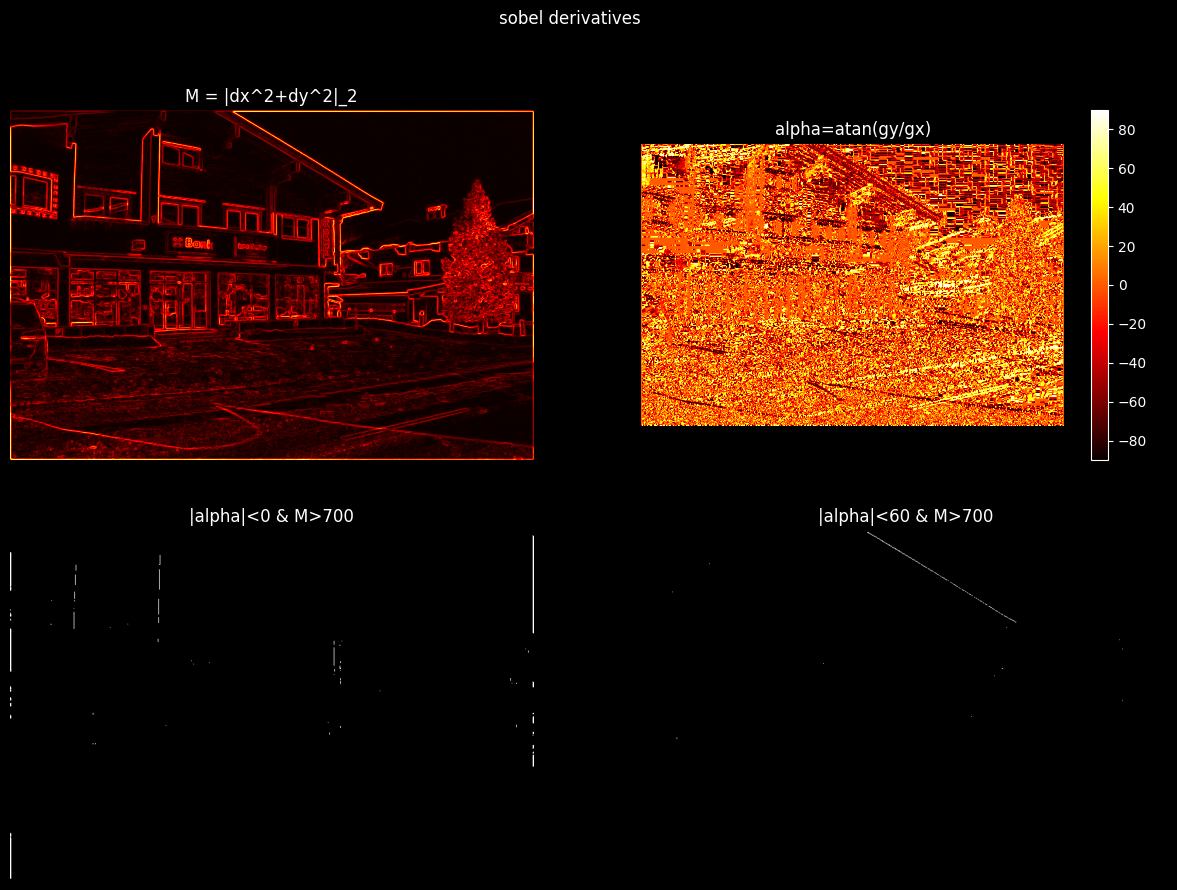

In [119]:
from scipy import signal

dx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]) #direction of the gradient
dy = dx.T
threshold = 40


gx = signal.convolve2d(g_img, dx)
gy = signal.convolve2d(g_img, dy)

M = np.sqrt(gx**2+gy**2)
A = np.arctan(gy/(gx+1E-10))*180/np.pi

fig, ax = plt.subplots(2,2, figsize=(15, 10))

fig.suptitle(f'sobel derivatives')

ax[0][0].imshow(M, cmap = 'hot')
ax[0][0].set_title('M = |dx^2+dy^2|_2')
ax[0][0].axis('off');

line= ax[0][1].imshow(A, cmap='hot')
ax[0][1].set_title('alpha=atan(gy/gx)')
ax[0][1].axis('off');
plt.colorbar(line)

angle = 0
mag   = 700
new_img = (np.abs(A + angle)<10) & (M > mag)

ax[1][0].imshow(new_img, cmap = 'gray')
ax[1][0].set_title(f'|alpha|<{angle} & M>{mag}')
ax[1][0].axis('off');

angle = 60
mag   = 700
new_img = (np.abs(A + angle)<10) & (M > mag)

ax[1][1].imshow(new_img, cmap = 'gray')
ax[1][1].set_title(f'|alpha|<{angle} & M>{mag}')
ax[1][1].axis('off');

Laplacian of a Gaussian

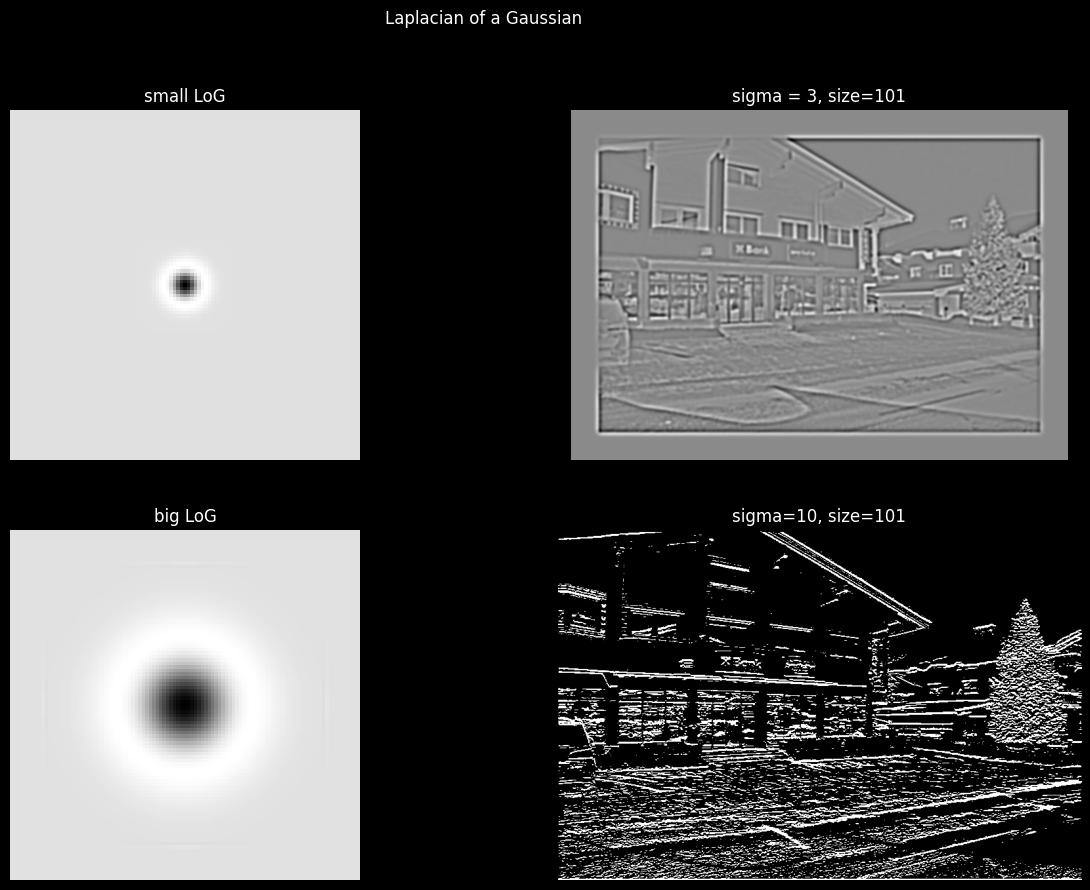

In [123]:
from scipy import signal
from scipy import ndimage

#Laplacian of a Gaussian

def LoG(size, sigma):
    F = np.zeros((size,size)) #Identity
    F[size//2,size//2]=1
    F = ndimage.gaussian_filter(F, sigma)
    F = ndimage.laplace(F)
    return F

fig, ax = plt.subplots(2,2, figsize=(15, 10))

fig.suptitle(f'Laplacian of a Gaussian')
F = LoG(101, 3)
new_img = signal.convolve2d(g_img, F)

ax[0][0].imshow(F, cmap = 'gray')
ax[0][0].set_title(f'small LoG')
ax[0][0].axis('off');

ax[0][1].imshow(new_img, cmap='gray')
ax[0][1].set_title(f'sigma = {3}, size={101}')
ax[0][1].axis('off');

F = LoG(101, 10)
new_img = signal.convolve2d(g_img, F)

ax[1][0].imshow(F, cmap = 'gray')
ax[1][0].set_title(f'big LoG')
ax[1][0].axis('off');

ax[1][1].imshow(gy>threshold, cmap='gray')
ax[1][1].set_title(f'sigma={10}, size={101}')
ax[1][1].axis('off');

Difference of Gaussian

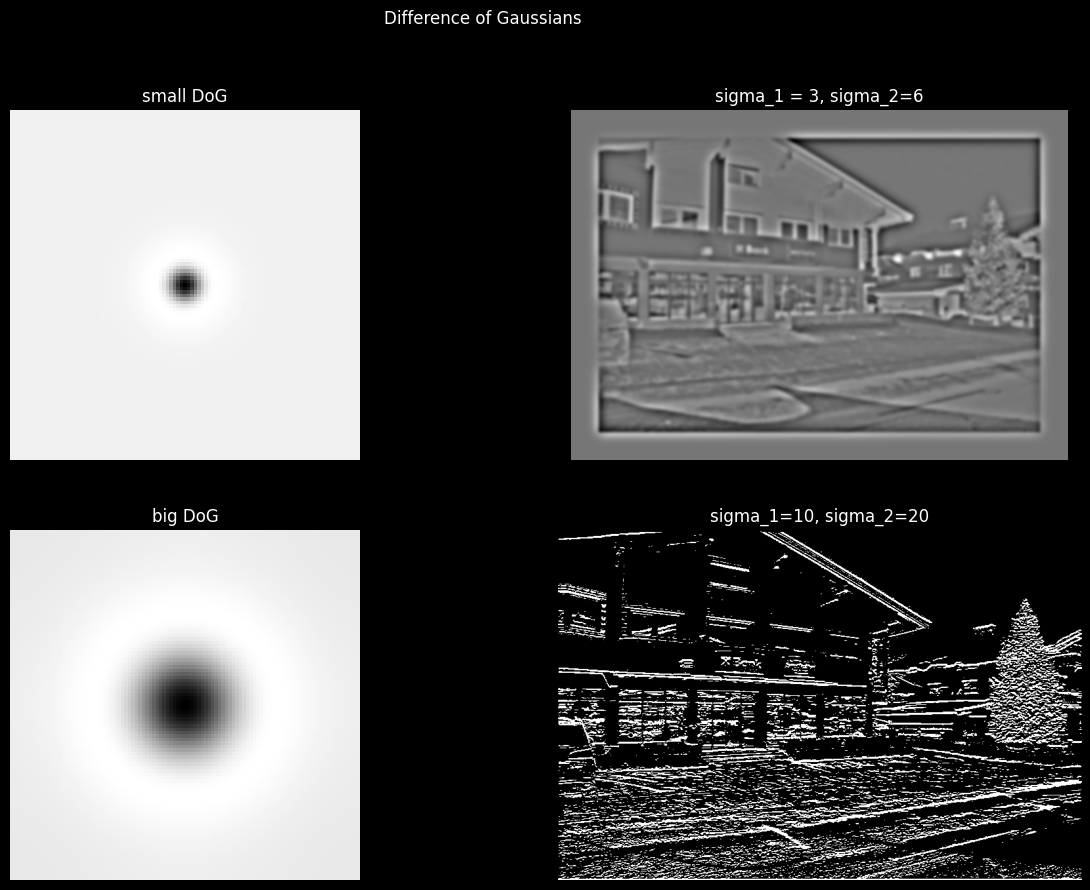

In [128]:
from scipy import signal
from scipy import ndimage

#Difference of Gaussians

def DoG(size, sigma_1, sigma_2):
    assert sigma_2 > sigma_1
    F = np.zeros((size,size)) #Identity
    F[size//2,size//2]=1
    F1 = ndimage.gaussian_filter(F, sigma_1)
    F2 = ndimage.gaussian_filter(F, sigma_2)
    return F2-F1

fig, ax = plt.subplots(2,2, figsize=(15, 10))

fig.suptitle(f'Difference of Gaussians')
F = DoG(101, 3, 9)
new_img = signal.convolve2d(g_img, F)

ax[0][0].imshow(F, cmap = 'gray')
ax[0][0].set_title(f'small DoG')
ax[0][0].axis('off');

ax[0][1].imshow(new_img, cmap='gray')
ax[0][1].set_title(f'sigma_1 = {3}, sigma_2={6}')
ax[0][1].axis('off');

F = DoG(101, 10, 20)
new_img = signal.convolve2d(g_img, F)

ax[1][0].imshow(F, cmap = 'gray')
ax[1][0].set_title(f'big DoG')
ax[1][0].axis('off');

ax[1][1].imshow(gy>threshold, cmap='gray')
ax[1][1].set_title(f'sigma_1={10}, sigma_2={20}')
ax[1][1].axis('off');

Canny edge detector

https://scikit-image.org/docs/stable/api/skimage.feature.html#skimage.feature.canny

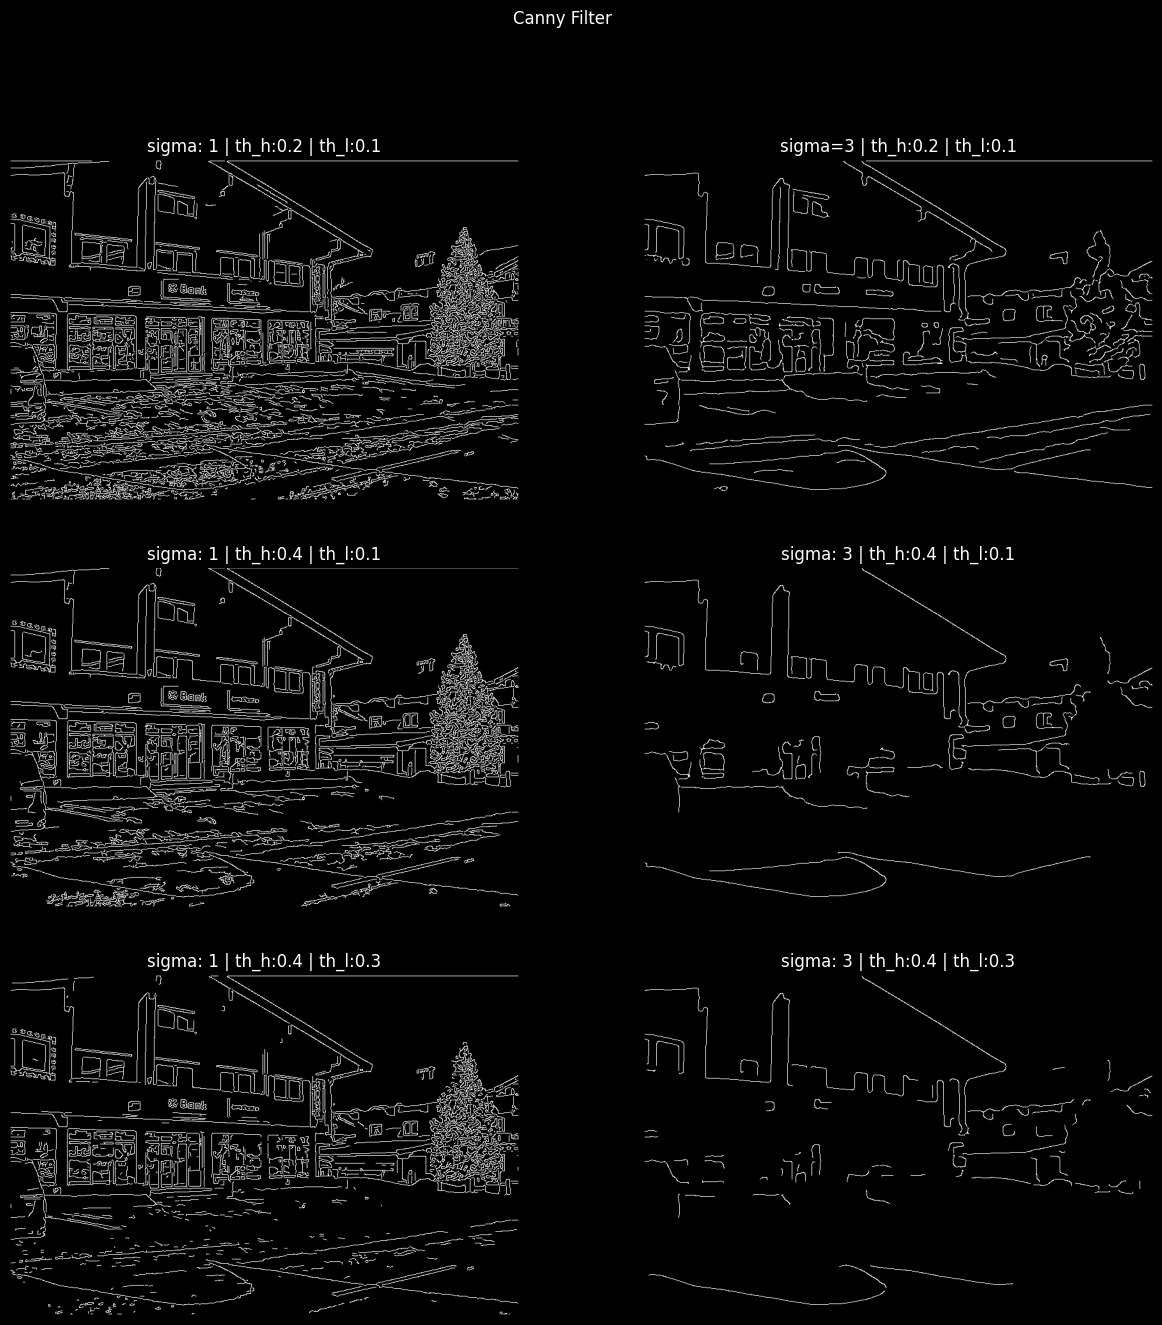

In [161]:
from skimage import feature

max_img = g_img.max()

#Canny Filter
fig, ax = plt.subplots(3,2, figsize=(15, 15))

fig.suptitle(f'Canny Filter')

th_h = 0.2
th_l = 0.1

new_img = feature.canny(g_img, sigma=1, low_threshold=th_l*max_img, high_threshold=th_h*max_img)

ax[0][0].imshow(new_img, cmap = 'gray')
ax[0][0].set_title(f'sigma: {1} | th_h:{th_h} | th_l:{th_l}')
ax[0][0].axis('off');

new_img = feature.canny(g_img, sigma=3, low_threshold=th_l*max_img, high_threshold=th_h*max_img)

ax[0][1].imshow(new_img, cmap='gray')
ax[0][1].set_title(f'sigma={3} | th_h:{th_h} | th_l:{th_l}')
ax[0][1].axis('off');

th_h = 0.4
th_l = 0.1

new_img = feature.canny(g_img, sigma=1, low_threshold=th_l*max_img, high_threshold=th_h*max_img)

ax[1][0].imshow(new_img, cmap = 'gray')
ax[1][0].set_title(f'sigma: {1} | th_h:{th_h} | th_l:{th_l}')
ax[1][0].axis('off');

new_img = feature.canny(g_img, sigma=3, low_threshold=th_l*max_img, high_threshold=th_h*max_img)

ax[1][1].imshow(new_img, cmap='gray')
ax[1][1].set_title(f'sigma: {3} | th_h:{th_h} | th_l:{th_l}')
ax[1][1].axis('off');

th_h = 0.4
th_l = 0.3

new_img = feature.canny(g_img, sigma=1, low_threshold=th_l*max_img, high_threshold=th_h*max_img)

ax[2][0].imshow(new_img, cmap = 'gray')
ax[2][0].set_title(f'sigma: {1} | th_h:{th_h} | th_l:{th_l}')
ax[2][0].axis('off');

th_h = 0.4
th_l = 0.3

new_img = feature.canny(g_img, sigma=3, low_threshold=th_l*max_img, high_threshold=th_h*max_img)

ax[2][1].imshow(new_img, cmap='gray')
ax[2][1].set_title(f'sigma: {3} | th_h:{th_h} | th_l:{th_l}')
ax[2][1].axis('off');